In [1]:
# imports and loading
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import mplcursors
import matplotlib.cm as cm
import numpy as np
#%matplotlib notebook

In [2]:
# load in cActivators
saved_cActivators = pd.read_csv('../data/save_for_GAMs/composite_cAct_vals.csv', index_col = 0)


# GAMS calculated cActivators
kd_df = 10**pd.read_excel('../data/GAMS_output/Kd_results.xlsx').astype(float)
saved_cActivators= saved_cActivators[kd_df.columns]
TF_conc_df = 10**pd.read_excel('../data/GAMS_output/TF_conc_results.xlsx').astype(float)
calc_cAct = pd.DataFrame(index = saved_cActivators.columns, columns = saved_cActivators.index)
cActs = []
for sample in calc_cAct.columns:
    for gene in calc_cAct.index:
        calc_cAct.at[gene, sample] = TF_conc_df[sample].values[0] / kd_df[gene].values[0]
calc_cAct = calc_cAct.T

# max and min values of GAMs results
print('kd min = '+str(min(kd_df.values.flatten())))
print('kd max = '+str(max(kd_df.values.flatten())))
print('TF_conc min = '+str(min(TF_conc_df.values.flatten())))
print('TF_conc max = '+str(max(TF_conc_df.values.flatten())))

kd min = 1.0964781960901766e-07
kd max = 1.0470169571021044e-06
TF_conc min = 1e-09
TF_conc max = 1e-05


/tmp/ipykernel_747103/2045553069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


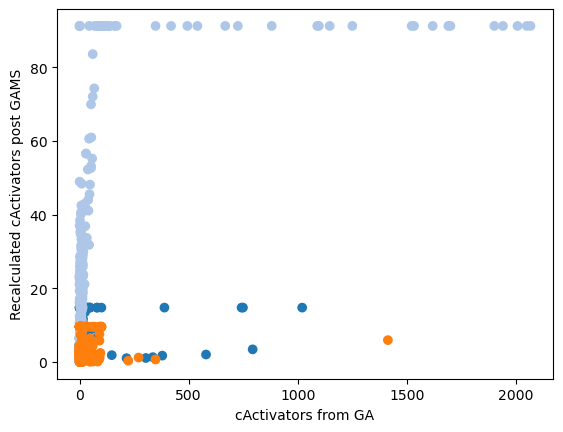

Correlation = 0.48


In [3]:
# plotting
saved = []
calc = []
labels = []
gene_to_color = {}
cmap = cm.get_cmap('tab20')
color_opts = iter(cmap.colors)
colors = []
for gene in calc_cAct.columns:
    if gene not in gene_to_color:
        gene_to_color.update({gene : next(color_opts)})
    color = gene_to_color[gene]
    for sample in calc_cAct.index:
        saved.append(saved_cActivators.loc[sample][gene])
        calc.append(calc_cAct.loc[sample][gene])
        labels.append(gene+', '+sample)
        colors.append(color)

fig, ax = plt.subplots()
scatter = plt.scatter(saved, calc, c = colors)
plt.xlabel('cActivators from GA')
plt.ylabel('Recalculated cActivators post GAMS')

cursor1 = mplcursors.cursor(scatter, hover = True)
cursor1.connect("add", lambda sel: sel.annotation.set_text(labels[sel.target.index]))

plt.show()

# correlation
corr = np.corrcoef(saved, calc)
print('Correlation = {:.2f}'.format(corr[1][0]))

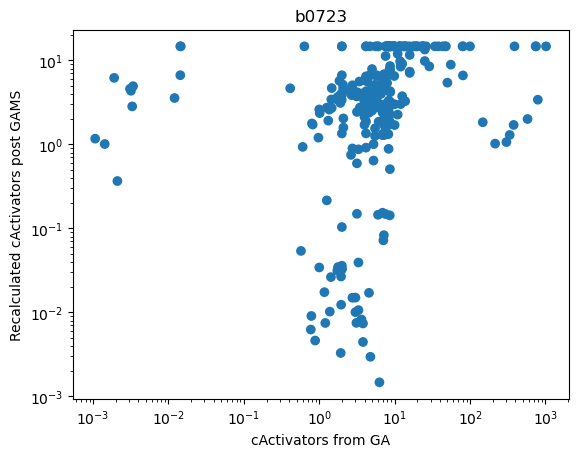

Correlation = 0.14


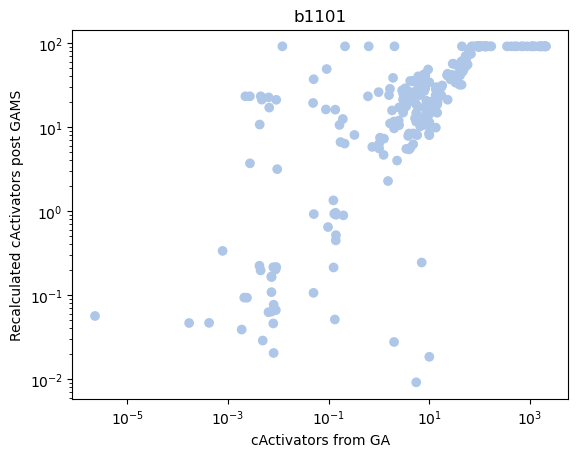

Correlation = 0.50


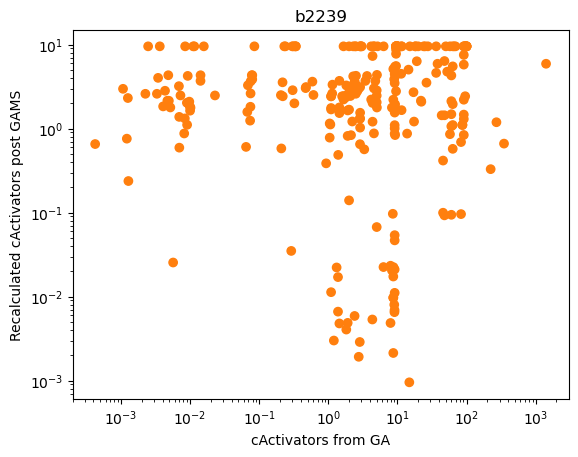

Correlation = 0.06


In [5]:
# plotting one at a time
for gene in calc_cAct.columns:
    saved = []
    calc = []
    labels = []
    colors = []
    if gene not in gene_to_color:
        gene_to_color.update({gene : next(color_opts)})
    color = gene_to_color[gene]
    for sample in calc_cAct.index:
        saved.append(saved_cActivators.loc[sample][gene])
        calc.append(calc_cAct.loc[sample][gene])
        labels.append(gene+', '+sample)
        colors.append(color)

    fig, ax = plt.subplots()
    scatter = plt.scatter(saved, calc, c = colors)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('cActivators from GA')
    plt.ylabel('Recalculated cActivators post GAMS')
    plt.title(gene)
    plt.show()

    # correlation
    corr = np.corrcoef(saved, calc)
    print('Correlation = {:.2f}'.format(corr[1][0]))

In [10]:
max(TF_conc_df.values.flatten())

1e-05

In [52]:
saved_cActivators

,b1101,b1817,b2239,b0723,b2597
control__wt_glc__1,31.0,18.5,36.0,30.5,26.0
control__wt_glc__2,15.0,38.0,22.0,15.0,20.0
fur__wt_dpd__1,8.0,13.5,13.5,10.5,13.5
fur__wt_dpd__2,12.5,21.0,6.5,9.5,17.5
fur__wt_fe__1,31.5,17.5,32.5,7.0,9.5
...,...,...,...,...,...
efeU__menFentCubiC_ale36__2,9.5,2.5,19.0,18.0,18.0
efeU__menFentCubiC_ale37__1,8.5,8.0,8.5,4.5,21.5
efeU__menFentCubiC_ale37__2,12.5,9.5,20.0,7.0,26.0
efeU__menFentCubiC_ale38__1,33.5,20.5,25.5,47.5,25.5


In [51]:
a

array([ 0.,  0.,  0., ..., 50., 50., 50.])